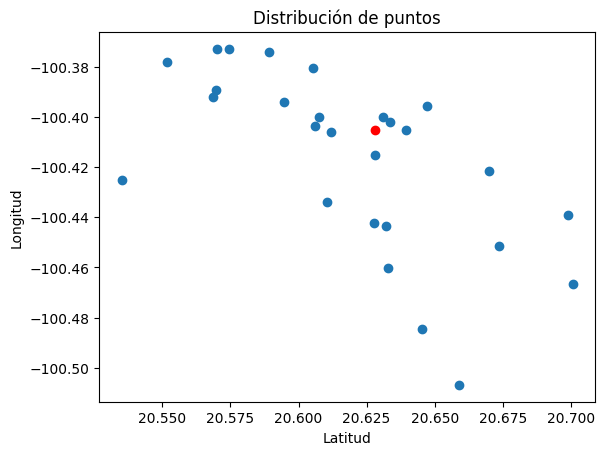

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

almacen = [20.628203, -100.405389]  # Latitud y longitud del almacén


data = {
    'id-paquete':[0,1,2,3,4,5,6,7,8,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27],
    'Latitud': [20.628183, 20.639298, 20.632158, 20.569612, 20.605947, 20.632750, 20.607337, 20.633744, 20.570005, 20.594828, 20.605149, 20.612102, 20.627788, 20.535101, 20.551797, 20.568732, 20.589091, 20.630968, 20.647214, 20.610377, 20.574447, 20.645377, 20.700711, 20.699112, 20.673499, 20.670068, 20.658850],
    'Longitud': [-100.415152, -100.405389, -100.443576, -100.389509, -100.403712, -100.460141, -100.400106, -100.402011, -100.372967, -100.393957, -100.380592, -100.406257, -100.442532, -100.425231, -100.378070, -100.392240, -100.374148, -100.400049, -100.395644, -100.433786, -100.373175, -100.484648, -100.466542, -100.439162, -100.451382, -100.421563, -100.506863],
}



df=pd.DataFrame(data)

#calcular distancia euclidiana al almacen
df['distancia'] = np.sqrt((df['Latitud'] - almacen[0])**2 + (df['Longitud'] - almacen[1])**2)
df = df.sort_values(by='distancia')

# Graficar los puntos del DataFrame
plt.scatter(df['Latitud'], df['Longitud'])

# Graficar un punto independiente
plt.scatter(20.628203, -100.405389, color='red')  # Reemplaza latitud_punto y longitud_punto con las coordenadas de tu punto

plt.xlabel('Latitud')
plt.ylabel('Longitud')
plt.title('Distribución de puntos')
plt.show()



In [29]:
print(len(df['Latitud']))


27


In [2]:

envio = {

    'id_envio':[], 
    'id_paquetes':[],
    'orden':[],
    'posicActual':[],
    
}

k=3

primeros_k = df.head(k)

# Asignar los id de los paquetes a una lista
paquetes_asignados = primeros_k['id-paquete'].tolist()

for i in range(k):
    
    print(i)
    envio['id_envio'].append(i)
    envio['id_paquetes'].append([paquetes_asignados[i],])
    envio['orden'].append([])

    # Obtener la id del paquete
    id_paquete = df.iloc[i]['id-paquete']

    # Obtener la latitud y longitud del paquete con la id dada
    latitud_paquete = df.loc[df['id-paquete'] == id_paquete, 'Latitud'].values[0]
    longitud_paquete = df.loc[df['id-paquete'] == id_paquete, 'Longitud'].values[0]

    envio['posicActual'].append([latitud_paquete, longitud_paquete])



df_envios = pd.DataFrame(envio)



0
1
2


In [3]:
df['id_envio']=0
#asignar nuevos paquetes a los envios de acuerdo a la distancia del paquete mas cercano de la posic actual de envio asignando cada k

for i in range(k-1, len(df['Latitud'])):
    
    print(i)

    # Obtener la latitud y longitud del paquete
    latitud_paquete = df.iloc[i]['Latitud']
    longitud_paquete = df.iloc[i]['Longitud']

   # Calcular la distancia entre el paquete y los envios

    datos_distancias = {
        'id_paquete':[],
        'latitud_paquete':[],
        'longitud_paquete':[],
        'distancia':[],
        'id_envio':[]
    }

    for j in range(k):

        latitud_envio = df_envios.iloc[j]['posicActual'][0]
        longitud_envio = df_envios.iloc[j]['posicActual'][1]

        distancia = np.sqrt((latitud_paquete - latitud_envio)**2 + (longitud_paquete - longitud_envio)**2)

        datos_distancias['id_paquete'].append(df.iloc[i]['id-paquete'])
        datos_distancias['latitud_paquete'].append(latitud_paquete)
        datos_distancias['longitud_paquete'].append(longitud_paquete)
        datos_distancias['distancia'].append(distancia)
        datos_distancias['id_envio'].append(j)
    
    df_distancias = pd.DataFrame(datos_distancias)

    df_distancias = df_distancias.sort_values(by='distancia')

    id_envio = df_distancias.head(1)['id_envio'].values[0]
    id_paquete = df_distancias.head(1)['id_paquete'].values[0]
    posicion_actual = df_distancias.head(1)[['latitud_paquete', 'longitud_paquete']].values[0]

    df_envios.loc[df_envios['id_envio'] == id_envio, 'id_paquetes'].values[0].append(id_paquete)
    df_envios.at[df_envios[df_envios['id_envio'] == id_envio].index[0], 'posicActual'] = posicion_actual

    df.at[df[df['id-paquete'] == id_paquete].index[0], 'id_envio'] = id_envio

    
        
        




2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26


In [69]:

df_envios.at[df_envios[df_envios['id_envio'] == 0].index[0], 'posicActual'] = [20.628203, -100.405389]

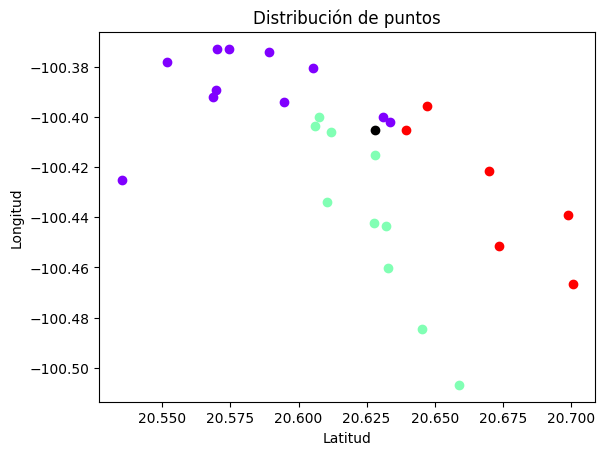

In [4]:
# Crear un mapeo de colores para los id_envio
unique_ids = df['id_envio'].unique()
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_ids)))
id_to_color = dict(zip(unique_ids, colors))

# Graficar los puntos del DataFrame
for i, row in df.iterrows():
    plt.scatter(row['Latitud'], row['Longitud'], color=id_to_color[row['id_envio']])

# Graficar un punto independiente
plt.scatter(almacen[0], almacen[1], color='black')  # Almacén

plt.xlabel('Latitud')
plt.ylabel('Longitud')
plt.title('Distribución de puntos')
plt.show()